#Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Cleaned Data for Further Analysis/Modeling

In [6]:
# Load the cleaned data
cleaned_data = pd.read_csv('cleaned_healthcare_dataset.csv')

#Exploratory Data Analysis (EDA):

You can now conduct exploratory data analysis (EDA) on the cleaned data to understand patterns, distributions, relationships between variables, etc.

Age                                           0
Billing Amount                                0
Room Number                                   0
age_billing amount_interaction                0
age_room number_billing amount_interaction    0
Gender_Male                                   0
Blood Type_A-                                 0
Blood Type_AB+                                0
Blood Type_AB-                                0
Blood Type_B+                                 0
Blood Type_B-                                 0
Blood Type_O+                                 0
Blood Type_O-                                 0
Medical Condition_Asthma                      0
Medical Condition_Cancer                      0
Medical Condition_Diabetes                    0
Medical Condition_Hypertension                0
Medical Condition_Obesity                     0
Insurance Provider_Blue Cross                 0
Insurance Provider_Cigna                      0
Insurance Provider_Medicare             

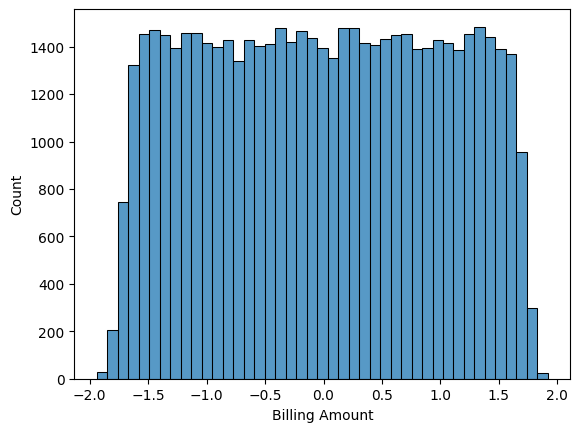

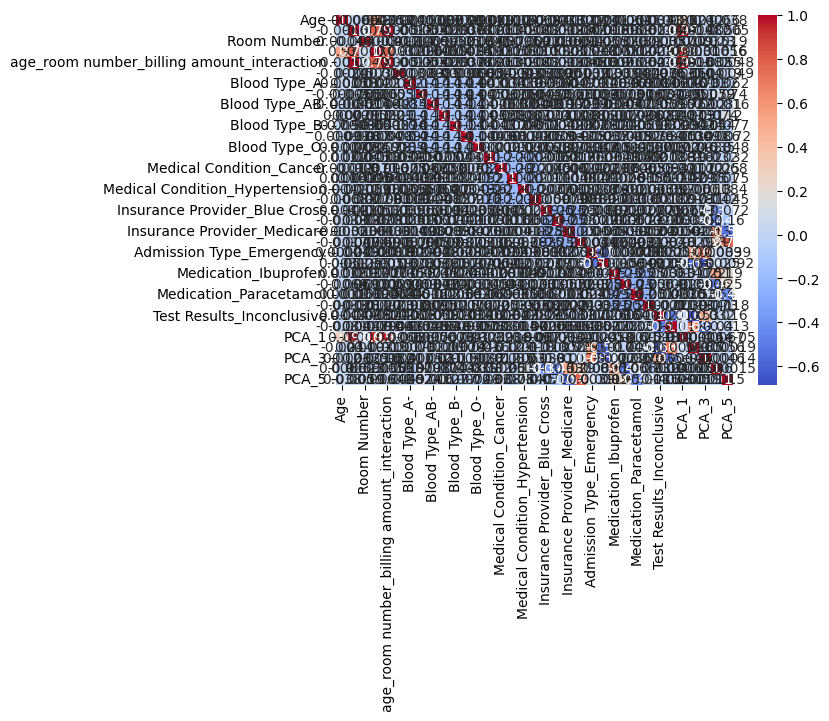

In [7]:
# Check for null values and basic statistics
print(cleaned_data.isnull().sum())
print(cleaned_data.describe())

# Example: Visualize the distribution of 'Billing Amount'
sns.histplot(cleaned_data['Billing Amount'])
plt.show()

# Example: Correlation heatmap for numeric features
correlation_matrix = cleaned_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


#Train Machine Learning Models

a. Feature Selection

In [8]:
# Example: Select features for a regression model
X = cleaned_data[['Age', 'Room Number', 'age_billing amount_interaction', 'Billing Amount']]  # Your selected features
y = cleaned_data['Billing Amount']  # Target variable


b. Split Data into Training and Test Sets

In [9]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c. Train the Model

In [10]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 5.875003329445745e-31
R2 Score: 1.0


#Save the Model

In [11]:
# import joblib

# # Save the trained model
# joblib.dump(model, 'trained_model.pkl')

# # Load the model back when needed
# loaded_model = joblib.load('trained_model.pkl')


#Further Data Analysis

C:\Users\local_10278018\Temp\ipykernel_145604\547751136.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cleaned_data['Billing Amount'].resample('M').mean().plot()


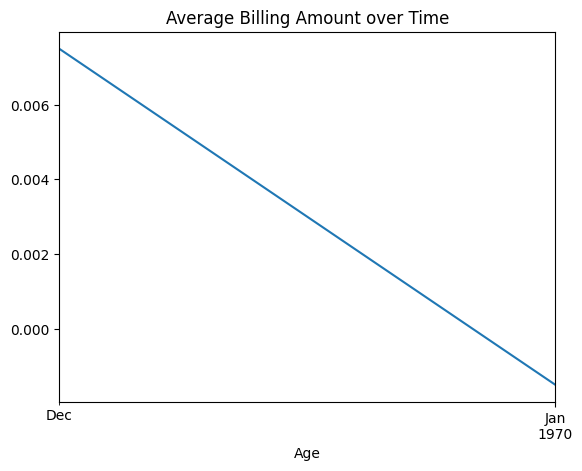

In [12]:
# Example: Convert 'Age' to datetime and perform time-series analysis
cleaned_data['Age'] = pd.to_datetime(cleaned_data['Age'])
cleaned_data.set_index('Age', inplace=True)

# Plot trends of 'Billing Amount' over time
cleaned_data['Billing Amount'].resample('M').mean().plot()
plt.title('Average Billing Amount over Time')
plt.show()
